In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

# Seaborn을 사용한 데이터 분포 시각화

In [69]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### 1차원 실수 분포 플롯

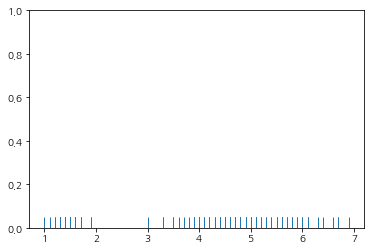

In [70]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("")
plt.show()

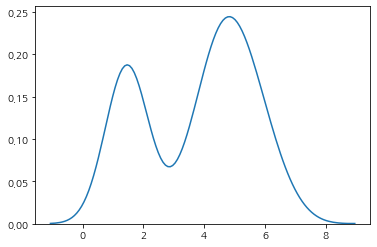

In [71]:
sns.kdeplot(x)
plt.show()

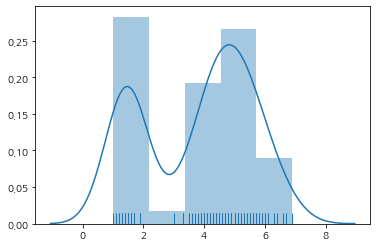

In [72]:
sns.distplot(x, kde=True,rug=True)
plt.show()

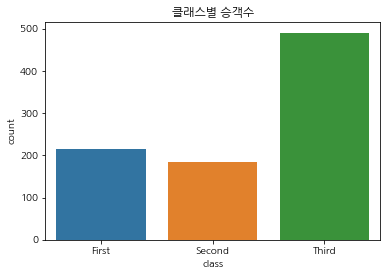

In [73]:
sns.countplot(x="class",data=titanic)
plt.title("클래스별 승객수")
plt.show()

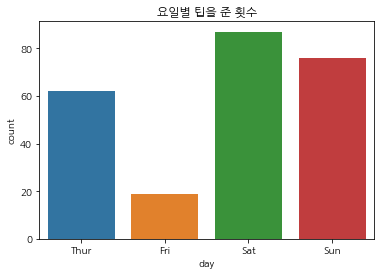

In [74]:
sns.countplot(x="day",data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [75]:
tips.groupby("day").count()[["tip"]]

,tip
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [76]:
iris.groupby("species").describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### 다차원 데이터

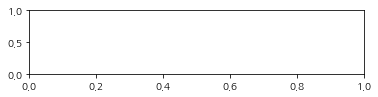

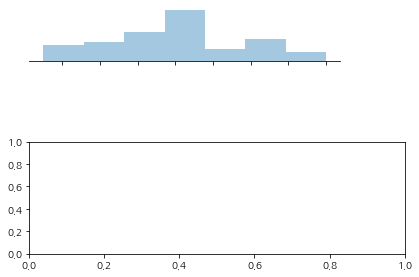

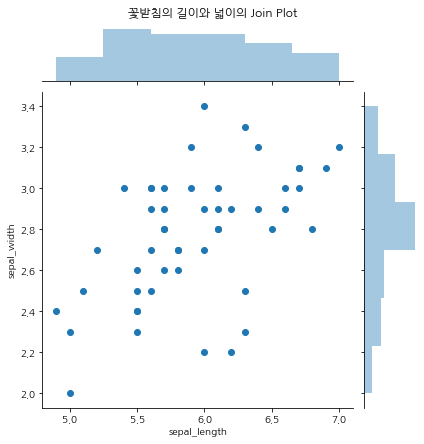

In [77]:
f1 = plt.figure()
plt.subplot(3,1,1)
sns.jointplot(x="sepal_length",y="sepal_width",data=iris[iris.species == "setosa"])
plt.subplot(3,1,2)
sns.jointplot(x="sepal_length",y="sepal_width",data=iris[iris.species == "versicolor"])
plt.suptitle("꽃받침의 길이와 넓이의 Join Plot",y=1.02)
plt.show()

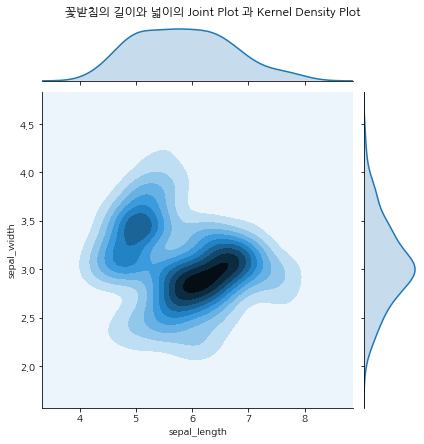

In [78]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

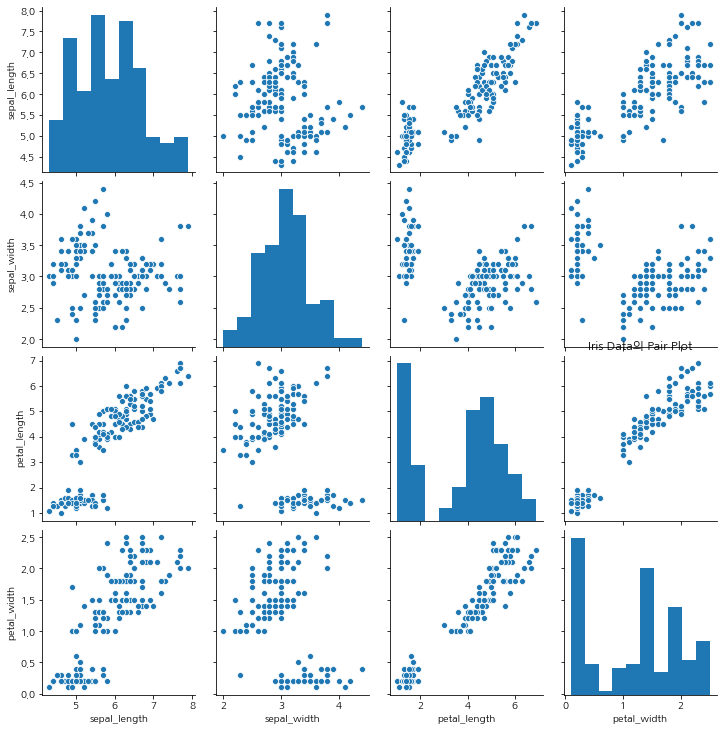

In [79]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

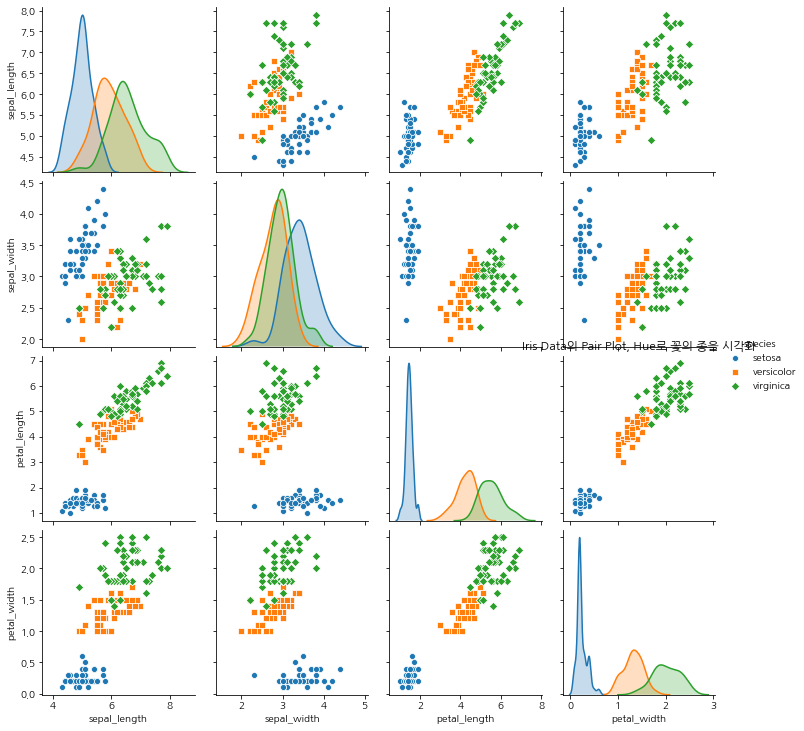

In [80]:
sns.pairplot(iris,hue="species",markers=["o","s","D"])
plt.title("Iris Data의 Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 2차원 카테고리 데이터

In [81]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


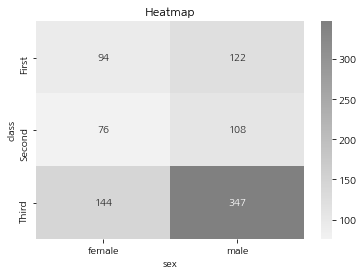

In [82]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

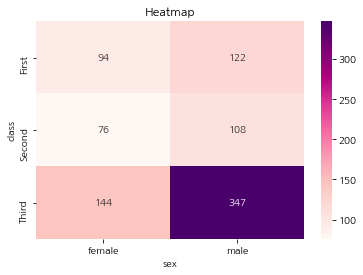

In [104]:
sns.heatmap(titanic_size, cmap='RdPu', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합데이터

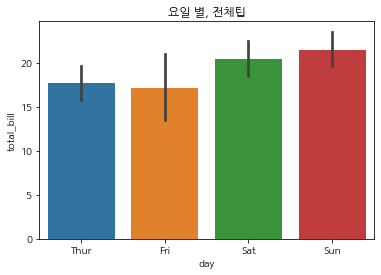

In [106]:
sns.barplot(x="day",y="total_bill",data=tips)
plt.title("요일 별, 전체팁")
plt.show()

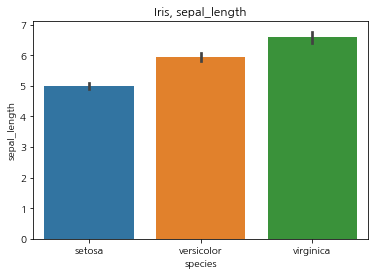

In [110]:
sns.barplot(x="species",y="sepal_length",data=iris)
plt.title("Iris, sepal_length")
plt.show()

In [116]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [122]:
mpg["manufacturer"] = mpg.apply(lambda r:str(r["name"]).split()[0],axis=1)
mpg["model"] = mpg.apply(lambda r:' '.join(str(r["name"]).split()[1:]),axis=1)
mpg["model"]

0      chevelle malibu
1          skylark 320
2            satellite
3            rebel sst
4               torino
            ...       
393         mustang gl
394             pickup
395            rampage
396             ranger
397               s-10
Name: model, Length: 398, dtype: object

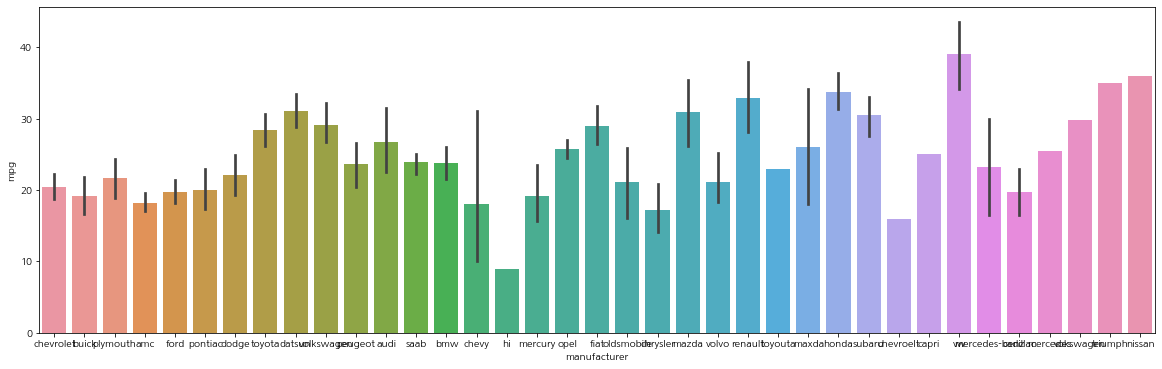

In [128]:
f1 = plt.figure(figsize=(20,6))
sns.barplot(x="manufacturer",y="mpg",data=mpg)
plt.title("")
plt.show()

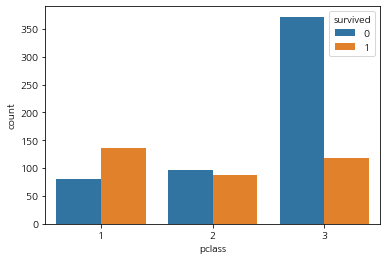

In [136]:
sns.countplot(x="pclass",hue="survived",data=titanic)
plt.show()

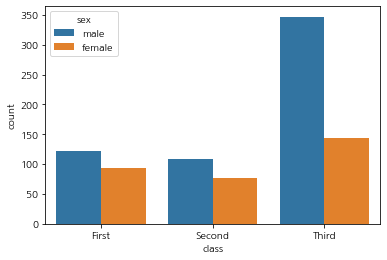

In [130]:
sns.countplot(x="class",hue="sex",data=titanic)
plt.show()

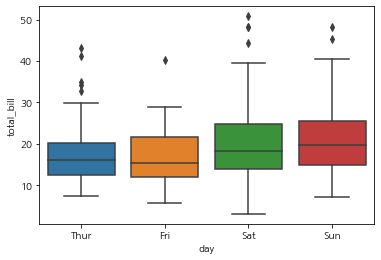

In [137]:
sns.boxplot(x="day",y="total_bill",data=tips)
plt.show()

### 다차원 복합데이터

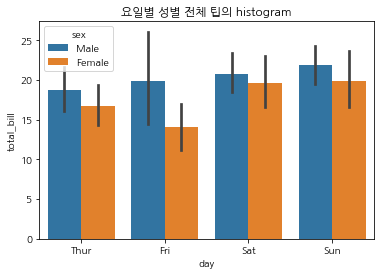

In [139]:
sns.barplot(x="day",y="total_bill",hue="sex",data=tips)
plt.title("요일별 성별 전체 팁의 histogram")
plt.show()

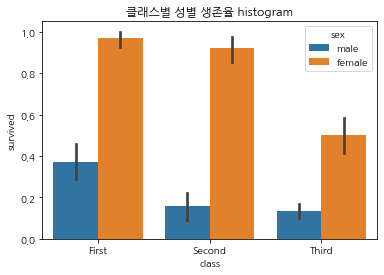

In [142]:
sns.barplot(x="class",y="survived",hue="sex",data=titanic)
plt.title("클래스별 성별 생존율 histogram")
plt.show()

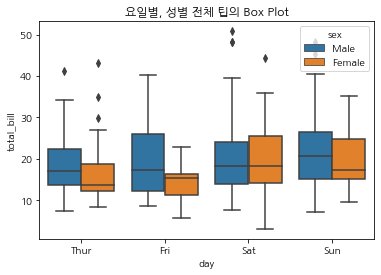

In [143]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=tips)
plt.title("요일별, 성별 전체 팁의 Box Plot")
plt.show()

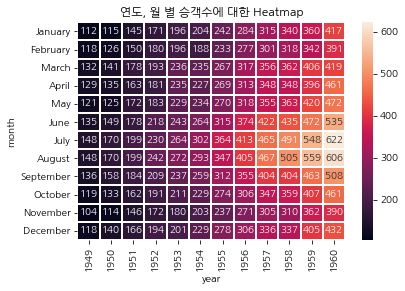

In [149]:
flights_passengers = flights.pivot("month","year","passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers,annot=True,fmt='d',linewidth=1)
plt.show()

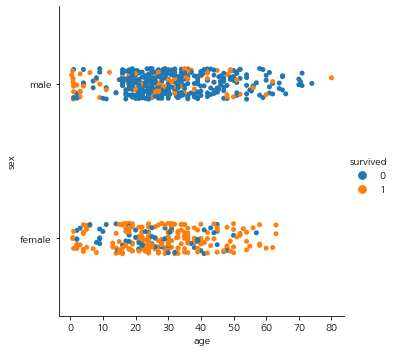

In [151]:
sns.catplot(x="age",y="sex",hue="survived",data=titanic)